In [1]:
from imutils import paths
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import random

2024-09-06 20:15:51.782732: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-09-06 20:15:53.450522: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [3]:
tf.config.list_physical_devices('GPU')

2024-09-06 20:15:53.451733: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-09-06 20:15:53.468490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-09-06 20:15:53.468616: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro P2000 computeCapability: 6.1
coreClock: 1.607GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 89.53GiB/s
2024-09-06 20:15:53.468635: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-09-06 20:15:53.470245: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-09-06 20:15:53.470286: I tensorflow/stream_executor/platform/default

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#**Fetching**

In [4]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FR0"))

data = []
data_cropped = []
labels = []
label = 0
counter_0 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 124, 124, 50, 50)
  data_cropped.append(image)
  labels.append(label)
  counter_0 += 1
print(f'Loaded FR0... {counter_0} files has loaded.')

2024-09-06 20:15:53.519298: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-06 20:15:53.520460: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-09-06 20:15:53.520864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-09-06 20:15:53.521044: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro P2000 computeCapability: 6.1
coreClock: 1.607GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 89.53GiB/s
2024-09-

Loaded FR0... 6066 files has loaded.


In [5]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FRI"))


label = 1
counter_1 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 124, 124, 50, 50)
  data_cropped.append(image)
  labels.append(label)
  counter_1 += 1
print(f'Loaded FRI... {counter_1} files has loaded.')

Loaded FRI... 5008 files has loaded.


In [6]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FRII"))

label = 2
counter_2 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 124, 124, 50, 50)
  data_cropped.append(image)
  labels.append(label)
  counter_2 += 1
print(f'Loaded FRII... {counter_2} files has loaded.')

Loaded FRII... 2066 files has loaded.


#**EDA**

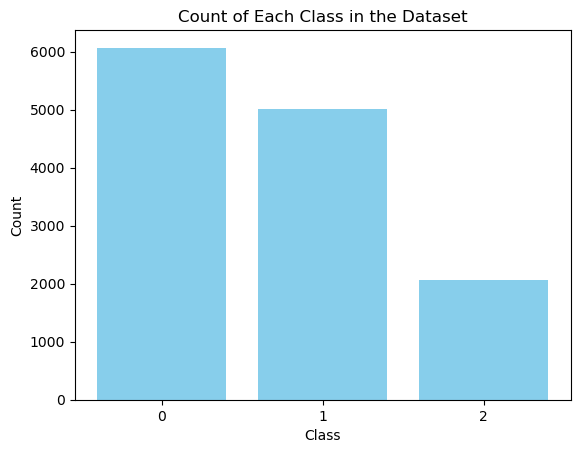

In [7]:
counter = Counter(labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [8]:
labels = np.array(labels,dtype='uint8')
data = np.array(data,dtype='uint8')
data_cropped = np.array(data_cropped,dtype='uint8')

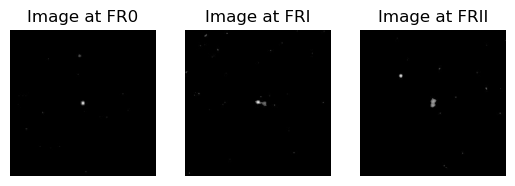

In [9]:
image = np.squeeze(data[0])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

image = np.squeeze(data[6066])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

image = np.squeeze(data[11075])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

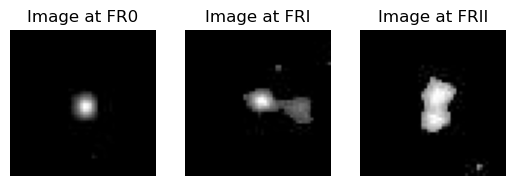

In [10]:
image = np.squeeze(data_cropped[0])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

image = np.squeeze(data_cropped[6066])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

image = np.squeeze(data_cropped[11075])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

In [11]:
data.shape, data_cropped.shape

((13140, 300, 300, 1), (13140, 50, 50, 1))

In [12]:
np.min(data_cropped[0]), np.max(data_cropped[0])

(0, 248)

#**Preprocessing**

In [13]:
data_normalized = data_cropped / 255

In [14]:
print(f'Min of original = {np.min(data_cropped[0])}')
print(f'Max of original = {np.max(data_cropped[0])}')
print(f'Min of original = {np.min(data_normalized[0])}')
print(f'Max of original = {np.max(data_normalized[0])}')

Min of original = 0
Max of original = 248
Min of original = 0.0
Max of original = 0.9725490196078431


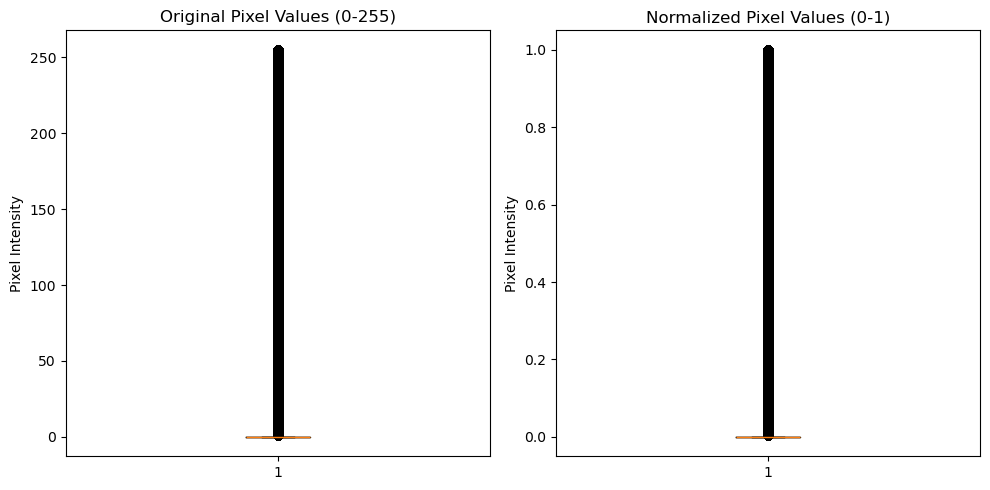

In [15]:
cropped_flat = data_cropped.flatten()
normalized_flat = data_normalized.flatten()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(cropped_flat)
plt.title("Original Pixel Values (0-255)")
plt.ylabel("Pixel Intensity")

plt.subplot(1, 2, 2)
plt.boxplot(normalized_flat)
plt.title("Normalized Pixel Values (0-1)")
plt.ylabel("Pixel Intensity")

plt.tight_layout()
plt.show()

#**Splitting**

In [16]:
x = data_normalized
y = labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9198, 50, 50, 1), (9198,), (3942, 50, 50, 1), (3942,))

#**Modelling**

In [17]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=3, activation=keras.activations.softmax))

In [18]:
optimizer = keras.optimizers.Adam()
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.CategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [19]:
model.build(input_shape=(None, 50, 50))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               320128    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 337,027
Trainable params: 337,027
Non-trainable params: 0
_________________________________________________________________


In [24]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9777 - val_loss: 1.5392 - val_accuracy: 0.8179
Epoch 2/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9783 - val_loss: 1.5946 - val_accuracy: 0.8026
Epoch 3/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9793 - val_loss: 1.6415 - val_accuracy: 0.8196
Epoch 4/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9776 - val_loss: 1.6453 - val_accuracy: 0.8133
Epoch 5/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0912 - accuracy: 0.9696 - val_loss: 1.4863 - val_accuracy: 0.8118
Epoch 6/100
144/144 [==============================] - 1s 4ms/step - loss: 0.0604 - accuracy: 0.9804 - val_loss: 1.5915 - val_accuracy: 0.7981
Epoch 7/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9770 - val_loss: 1.6240 - val_accuracy: 0.8120

In [25]:
index = random.randint(0, 3942)
test_image = x_test[index]

In [26]:
test_data = np.reshape(test_image, (-1, 2500))
test_data.shape

(1, 2500)

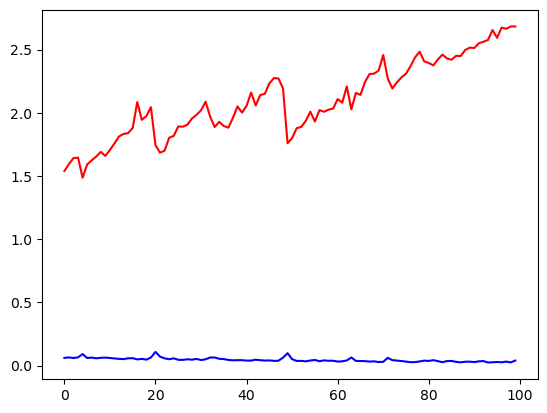

In [27]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.show()


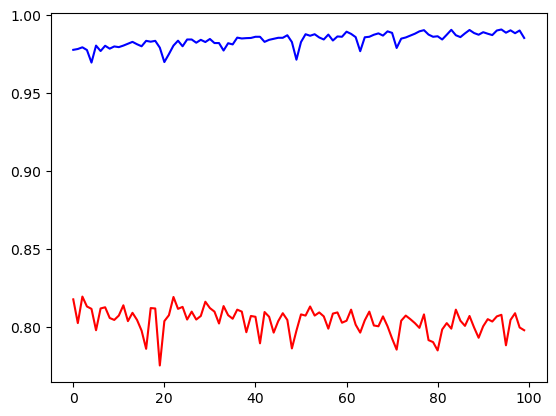

In [28]:
acc_train = hist.history['accuracy']
val_acc_test = hist.history['val_accuracy']

plt.plot(acc_train, color='blue')
plt.plot(val_acc_test, color='red')
plt.show()

#**CNN**

In [29]:
model_cnn = keras.Sequential()
model_cnn.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1, 1),padding='valid', activation='relu', input_shape=(50, 50, 1)))
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dense(units=3, activation=keras.activations.softmax))

In [30]:
optimizer = keras.optimizers.Adam()
loss = keras.losses.SparseCategoricalCrossentropy()
metric = [keras.metrics.CategoricalAccuracy()]

model_cnn.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
model_cnn.build(input_shape=(None, 50, 50))
model_cnn.summary()

In [ ]:
hist = model_cnn.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

In [ ]:
acc_train = hist.history['accuracy']
acc_test = hist.history['val_accuracy']

plt.plot(acc_train, color='blue')
plt.plot(acc_test, color='red')
plt.show()